<a href="https://colab.research.google.com/github/ssinghteju7484/Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# 📺 Netflix Movies and TV Shows Clustering

This project performs **unsupervised clustering** on Netflix titles using the publicly available dataset.
The goal is to discover hidden patterns and groupings among shows and movies based on various features such as genre, type, duration, and year of release.

## 🧹 Data Cleaning

In [17]:
df = df.dropna(subset=['listed_in', 'duration', 'release_year'])
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df = df[['title', 'type', 'release_year', 'duration_num', 'genre']]
df.head()

,title,type,release_year,duration_num,genre
0,3%,TV Show,2020,4,International TV Shows
1,7:19,Movie,2016,93,Dramas
2,23:59,Movie,2011,78,Horror Movies
3,9,Movie,2009,80,Action & Adventure
4,21,Movie,2008,123,Dramas


## 🔧 Feature Encoding

In [18]:
from sklearn.preprocessing import StandardScaler
df_encoded = pd.get_dummies(df, columns=['type', 'genre'])
features = df_encoded.drop(columns=['title'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## 📊 Elbow Method for Optimal Clusters

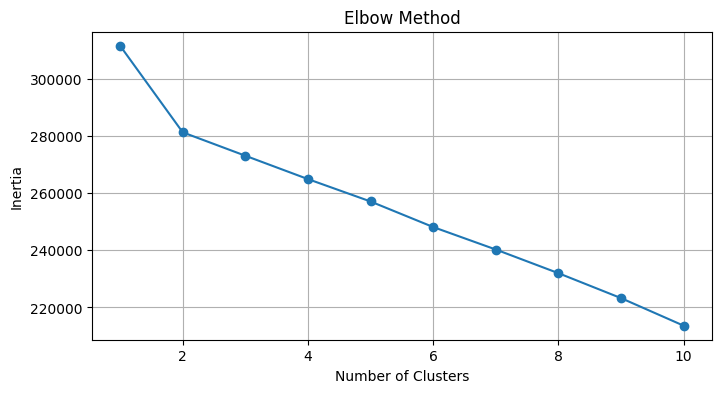

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## 🤖 KMeans Clustering (k=4)

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)
df.sample(10)

,title,type,release_year,duration_num,genre,cluster
3538,Last Chance U,TV Show,2020,5,Docuseries,0
6083,The Angel,Movie,2018,114,Dramas,1
3902,Manglehorn,Movie,2014,97,Dramas,1
903,Big Fat Liar,Movie,2002,88,Children & Family Movies,1
1493,Cook Off,Movie,2017,100,Comedies,1
2829,Hotel Transylvania 3: Summer Vacation,Movie,2018,97,Children & Family Movies,1
4711,Over Christmas,TV Show,2020,1,International TV Shows,0
5021,QB1: Beyond the Lights,TV Show,2019,1,Docuseries,0
6262,The Da Vinci Code,Movie,2006,149,Thrillers,1
3210,John Mulaney: The Comeback Kid,Movie,2015,62,Stand-Up Comedy,1


## 🌈 Cluster Visualization using PCA

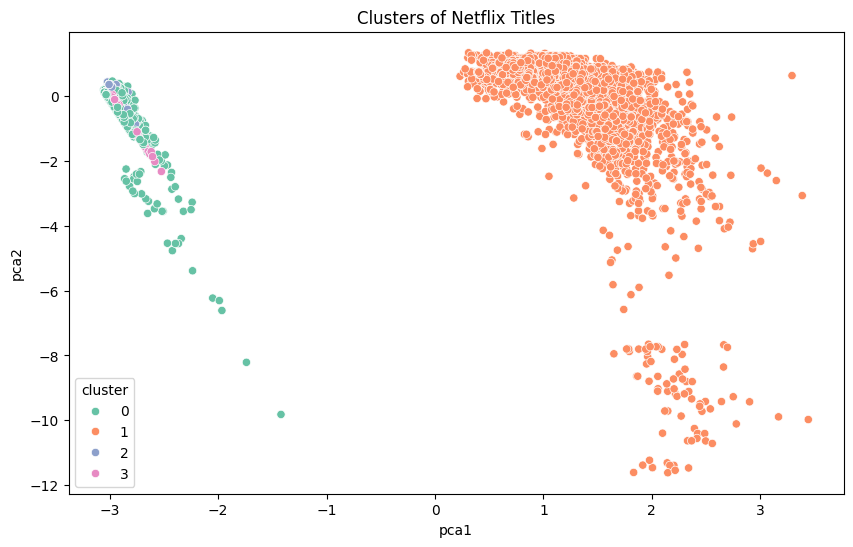

In [21]:

from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Clusters of Netflix Titles')
plt.show()